# **Download the Data set From Kaggle**

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sathushanag","key":"24ed2c46bfc00c22f72898d93d683284"}'}

In [3]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# **Load the Data set**

In [4]:
!kaggle datasets download -d rishiksaisanthosh/brain-tumour-classification

Dataset URL: https://www.kaggle.com/datasets/rishiksaisanthosh/brain-tumour-classification
License(s): unknown


In [5]:
import zipfile

with zipfile.ZipFile("brain-tumour-classification.zip", "r") as zip_ref:
    zip_ref.extractall("brain-tumour-classification")

In [6]:
import os

dataset_path = "brain-tumour-classification/BrainTumor_1"
folders = os.listdir(dataset_path)
print("Folders in dataset:", folders)

Folders in dataset: ['Test', 'Train']


# **Data Preprocessing**

In [7]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [8]:
import numpy as np

In [9]:
IMAGE_SIZE = 100
BATCH_SIZE = 16

In [10]:
CHANNELS = 3
EPOCHS = 30

In [11]:
train_datasets=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain-tumour-classification/BrainTumor_1/Train',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 22848 files belonging to 4 classes.


In [12]:
test_datasets=tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain-tumour-classification/BrainTumor_1/Test',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1311 files belonging to 4 classes.


## **Data Visualization**

In [13]:
train_len = len(train_datasets)
test_len = len(test_datasets)

In [14]:
print("Length of Train dataset:",train_len)
print("Length of Test dataset:",test_len)

Length of Train dataset: 1428
Length of Test dataset: 82


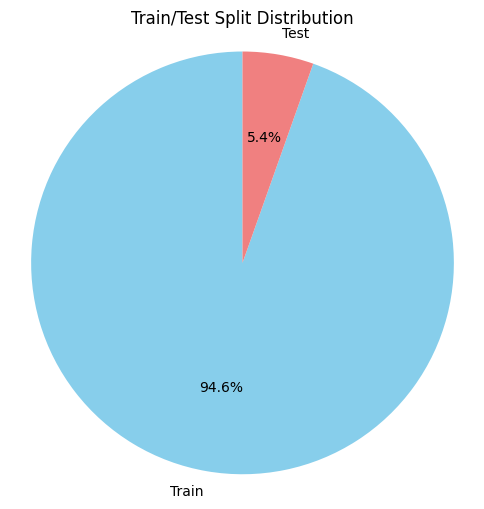

In [15]:
# Pie chart
labels = ['Train', 'Test']
sizes = [train_len, test_len]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Train/Test Split Distribution')
plt.axis('equal')
plt.show()

## **Seeing the class distribution in the train dataset**

In [16]:
class_names =train_datasets.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf

def show_class_distribution(dataset, title) -> None:
    class_names = dataset.class_names
    class_counts = [0] * len(class_names)

    for images, labels in dataset:
        labels = labels.numpy()
        for label in labels:
            class_counts[label] += 1


    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
    plt.title(f'Class Distribution in {title}')
    plt.axis('equal')
    plt.show()


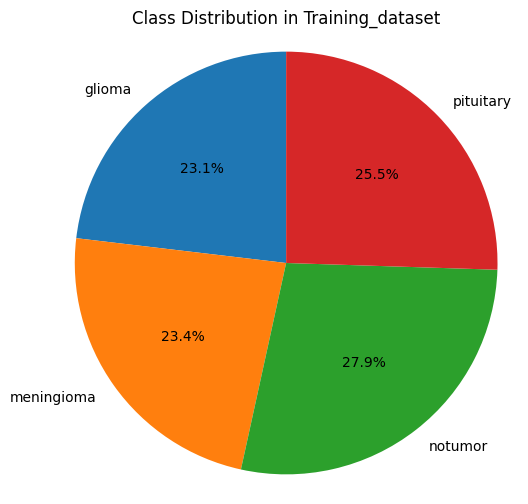

In [18]:
show_class_distribution(train_datasets,'Training_dataset')

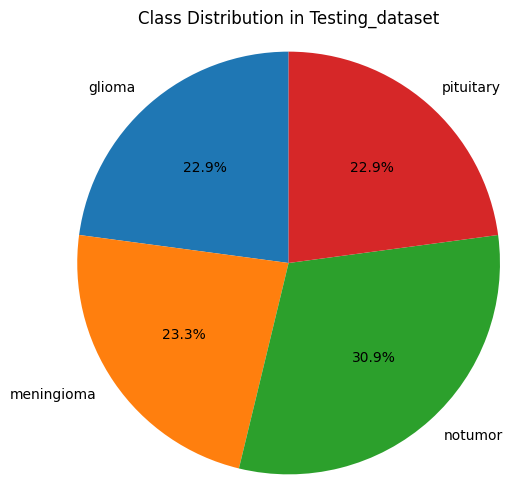

In [19]:
show_class_distribution(test_datasets,'Testing_dataset')

### **Visualize the data set**

In [20]:
for image_batch,label_batch in train_datasets.take(1):
  # print(image_batch[0].numpy())
  print(image_batch[0].shape)

(100, 100, 3)


In [21]:
def show_brain_tumor_images(dataset):
  plt.figure(figsize=(12,12))
  for image_batch,label_batch in dataset.take(1):
    for i in range(12):
      ax = plt.subplot(4,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(dataset.class_names[label_batch[i]])
      plt.axis("off")

#### **Training data**

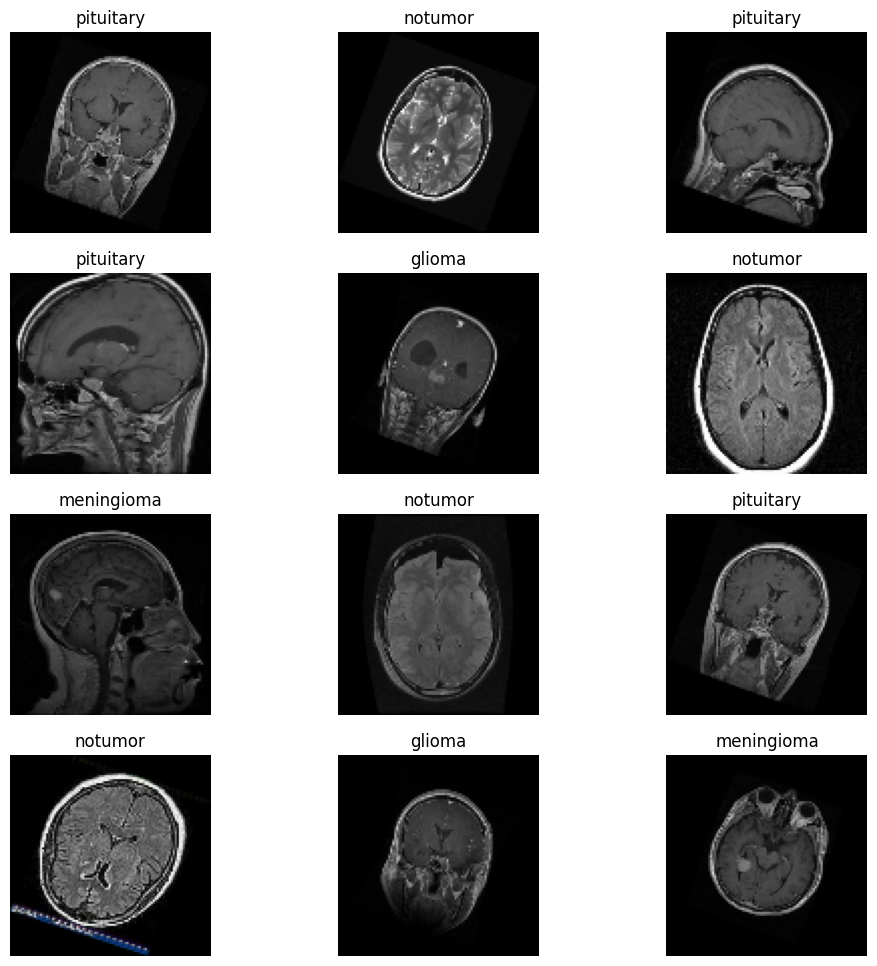

In [22]:
show_brain_tumor_images(train_datasets)

#### **Testing data**

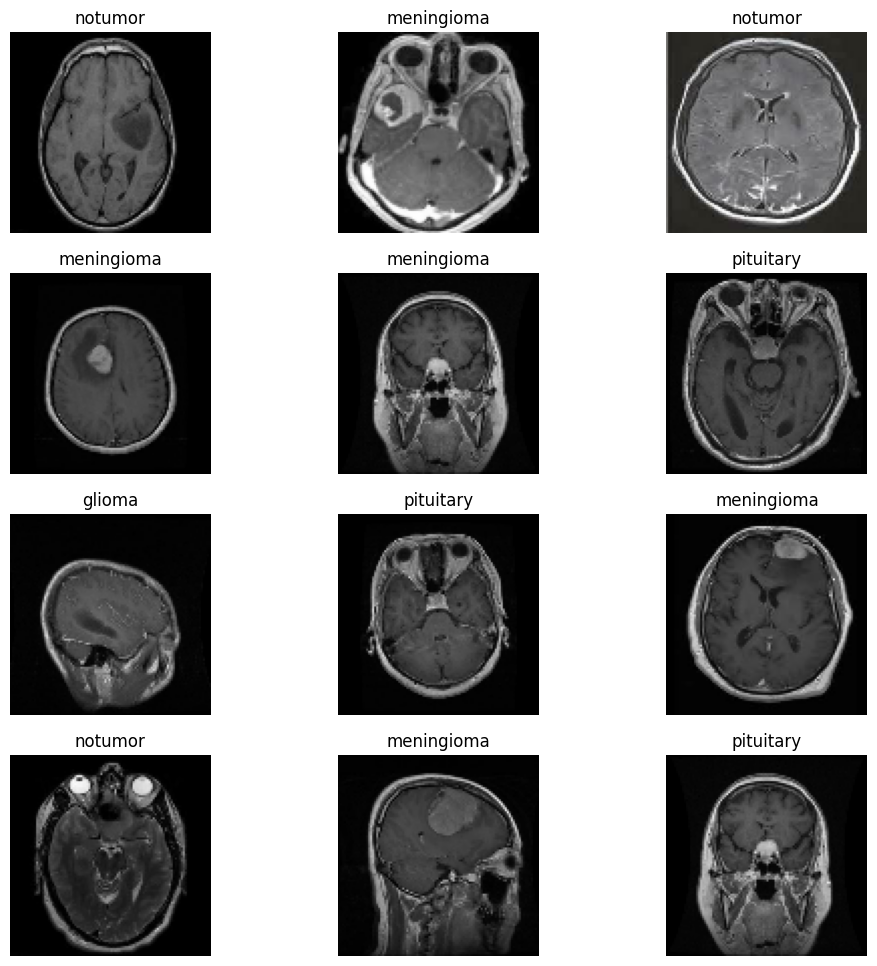

In [23]:
show_brain_tumor_images(test_datasets)

In [24]:
def get_dataset_partitions_tf(ds,val_split=0.5,shuffle=True,shuffle_size=1000):
  ds_size = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)


  val_size = int(ds_size*val_split)

  val_ds = ds.take(val_size)
  test_ds = ds.skip(val_size)

  return val_ds,test_ds

In [25]:
val_ds,test_ds = get_dataset_partitions_tf(train_datasets)
train_ds=train_datasets

In [26]:
len(test_ds),len(val_ds)

(714, 714)

In [27]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

In [29]:
data_augumentation = tf.keras.Sequential([
    layers.RandomRotation(0.1),
    layers.RandomTranslation(0.1, 0.1,fill_mode='nearest'),
    layers.RandomZoom(0.4),
    layers.RandomFlip('horizontal'),
    layers.RandomContrast(0.1),
    # layers.RandomBrightness(factor=(0.01,0.1))
])

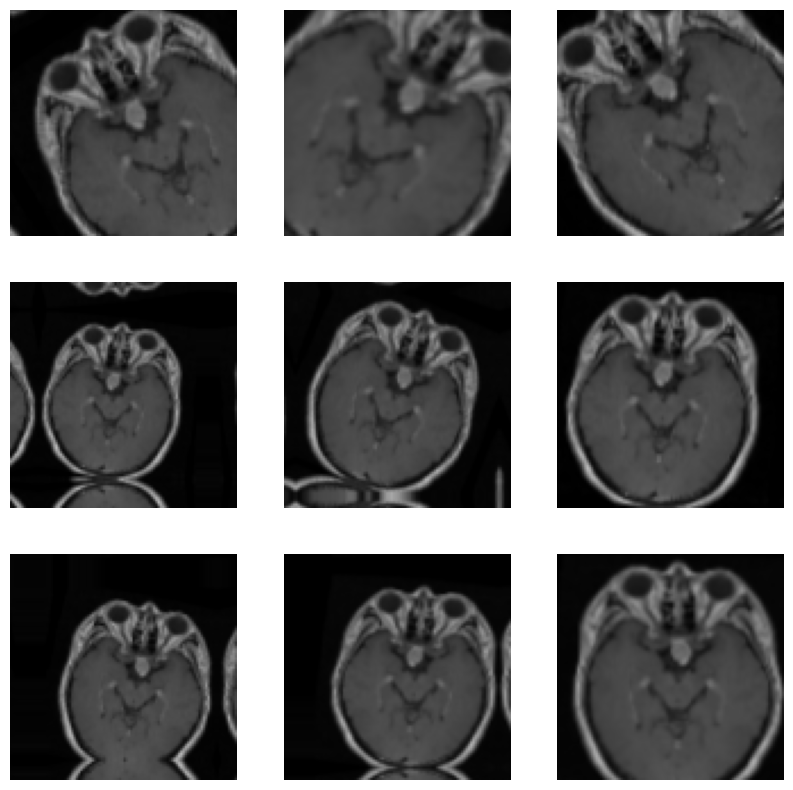

In [30]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augumentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# **Develop the CNN Model**

## **Load the Develop the CNN Model**

## **CNN Model**

In [31]:
cnn_model = tf.keras.models.load_model("/content/model_fine_cnn.h5")

## **VGG16**

In [32]:
vgg16_model = tf.keras.models.load_model("/content/model_vgg16.h5")

## **VGG 19**

In [33]:
vgg19_model = tf.keras.models.load_model("/content/vgg19_model.h5")

## **RestNet101**

In [42]:
restnet101_model = tf.keras.models.load_model("/content/restNet101_model.h5")

## **Mobile Net V2**

In [43]:
mobilenetv2_model = tf.keras.models.load_model("/content/model_mobilenetv2.h5")

## **Develop the Inception V3 Model**

In [34]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [35]:
IMG_SHAPE = (IMAGE_SIZE,IMAGE_SIZE,3)

In [36]:
baseModel_inceptionV3 =InceptionV3(weights="imagenet",
                            include_top=False,
                            input_shape=IMG_SHAPE)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [37]:
baseModel_inceptionV3.trainable = False

In [38]:
shape = (IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 4

inputs = tf.keras.Input(shape= shape)
x = data_augumentation(inputs)
x = resize_and_rescale(x)
x = baseModel_inceptionV3(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.25)(x)
outputs = tf.keras.layers.Dense(n_classes, activation='sigmoid')(x)

model_inceptionv3 = tf.keras.Model(inputs, outputs)

In [39]:
model_inceptionv3.summary()

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 1, 1, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,065,572 (84.17 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [40]:
base_learning_rate = 0.00001
model_inceptionv3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics= ['accuracy'])

In [41]:
history_inceptionv2 = model_inceptionv3.fit(train_ds,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=1,
                    validation_data=val_ds)

Epoch 1/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 103s 53ms/step - accuracy: 0.3676 - loss: 1.4841 - val_accuracy: 0.6169 - val_loss: 0.9560
Epoch 2/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.5537 - loss: 1.0511 - val_accuracy: 0.6591 - val_loss: 0.8588
Epoch 3/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 91s 37ms/step - accuracy: 0.6047 - loss: 0.9451 - val_accuracy: 0.6773 - val_loss: 0.8085
Epoch 4/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.6240 - loss: 0.9087 - val_accuracy: 0.6908 - val_loss: 0.7817
Epoch 5/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 42s 30ms/step - accuracy: 0.6298 - loss: 0.8842 - val_accuracy: 0.6938 - val_loss: 0.7698
Epoch 6/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.6465 - loss: 0.8518 - val_accuracy: 0.6988 - val_loss: 0.7483
Epoch 7/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.6624 - loss: 0.8262 - val_accuracy: 0.6981 - val_loss: 0.7523
Epoch 8/30
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.6704 

# **Fine Tune the Model**

In [63]:
baseModel_inceptionV3.trainable = True

In [64]:
len(baseModel_inceptionV3.layers)

311

In [65]:
fine_tune_at = 200

In [66]:
for layer in baseModel_inceptionV3.layers[:fine_tune_at]:
  layer.trainable = False

In [67]:
initial_epoch = len(history_inceptionv2.epoch)
fine_tune_epochs = 10

history_inceptionV3_finetune = model_inceptionv3.fit(
    train_ds,
    epochs=EPOCHS + fine_tune_epochs,
    initial_epoch=initial_epoch,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = val_ds)

Epoch 31/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.7345 - loss: 0.6594 - val_accuracy: 0.7560 - val_loss: 0.6038
Epoch 32/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.7365 - loss: 0.6487 - val_accuracy: 0.7470 - val_loss: 0.6224
Epoch 33/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - accuracy: 0.7395 - loss: 0.6457 - val_accuracy: 0.7508 - val_loss: 0.6095
Epoch 34/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7385 - loss: 0.6461 - val_accuracy: 0.7623 - val_loss: 0.5925
Epoch 35/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7425 - loss: 0.6462 - val_accuracy: 0.7561 - val_loss: 0.6036
Epoch 36/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.7479 - loss: 0.6394 - val_accuracy: 0.7497 - val_loss: 0.6139
Epoch 37/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.7479 - loss: 0.6296 - val_accuracy: 0.7546 - val_loss: 0.6020
Epoch 38/40
1428/1428 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 

In [79]:
model_inceptionv3.save("model_inceptionv3.h5")

# **Evaluate the Model**

## **CNN Model**

In [44]:
cnn_train_scores =cnn_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9009 - loss: 0.3191


In [45]:
cnn_val_scores = cnn_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9008 - loss: 0.3285


In [46]:
cnn_test_scores = cnn_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 33s 4ms/step - accuracy: 0.8998 - loss: 0.3302


In [47]:
cnn_train_scores

[0.3212950825691223, 0.9003851413726807]

## **VGG 16**

In [48]:
vgg16_train_scores = vgg16_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.6569 - loss: 0.9211


In [49]:
vgg16_val_scores = vgg16_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6471 - loss: 0.9319


In [50]:
vgg16_test_scores = vgg16_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6472 - loss: 0.9299


## **VGG 19**

In [51]:
vgg19_train_scores = vgg19_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.7371 - loss: 0.7391


In [52]:
vgg19_val_scores = vgg19_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7428 - loss: 0.7347


In [53]:
vgg19_test_scores = vgg19_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.7414 - loss: 0.7288


## **Rest Net101**

In [54]:
restnet101_train_scores = restnet101_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 64s 39ms/step - accuracy: 0.5553 - loss: 1.1307


In [55]:
restnet101_val_scores = restnet101_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5548 - loss: 1.1291


In [56]:
restnet101_test_scores = restnet101_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 27s 38ms/step - accuracy: 0.5609 - loss: 1.1287


## **Mobile Netv2 Model**

In [57]:
mobilenetv2_train_scores = mobilenetv2_model.evaluate(train_ds)

1428/1428 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.7114 - loss: 0.7995


In [58]:
mobilenetv2_val_scores = mobilenetv2_model.evaluate(val_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7076 - loss: 0.8245


In [59]:
mobilenetv2_test_scores = mobilenetv2_model.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7059 - loss: 0.8280


## **Inception V3**

In [60]:
inceptionv3_test_scores = model_inceptionv3.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7438 - loss: 0.6266


In [61]:
acc_inceptionv2 = history_inceptionv2.history['accuracy']
val_acc_inceptionv2 = history_inceptionv2.history['val_accuracy']
loss_inceptionv2 = history_inceptionv2.history['loss']
val_loss_inceptionv2 = history_inceptionv2.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss for \n inceptionv3')

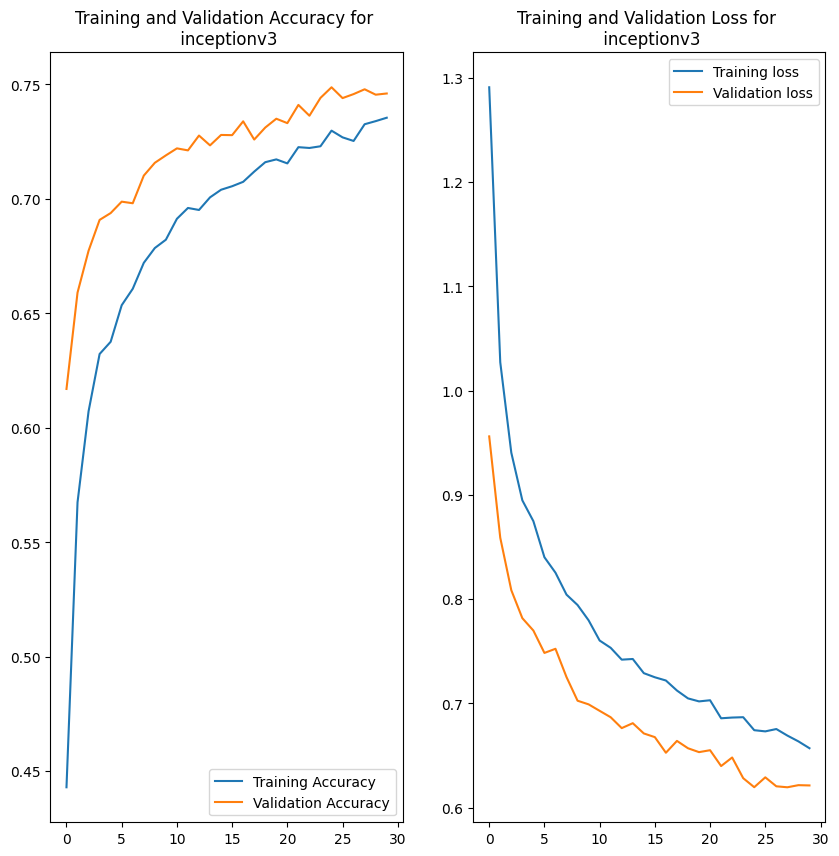

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc_inceptionv2,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc_inceptionv2,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy for \n inceptionv3')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss_inceptionv2 ,label='Training loss')
plt.plot(range(EPOCHS),val_loss_inceptionv2,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss for \n inceptionv3')

### **After fine tuning**

In [68]:
inceptionv3_test_scores = model_inceptionv3.evaluate(test_ds)

714/714 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.7513 - loss: 0.6156


In [69]:
acc_inceptionv2 += history_inceptionV3_finetune.history['accuracy']
val_acc_inceptionv2 += history_inceptionV3_finetune.history['val_accuracy']
loss_inceptionv2 += history_inceptionV3_finetune.history['loss']
val_loss_inceptionv2 += history_inceptionV3_finetune.history['val_loss']

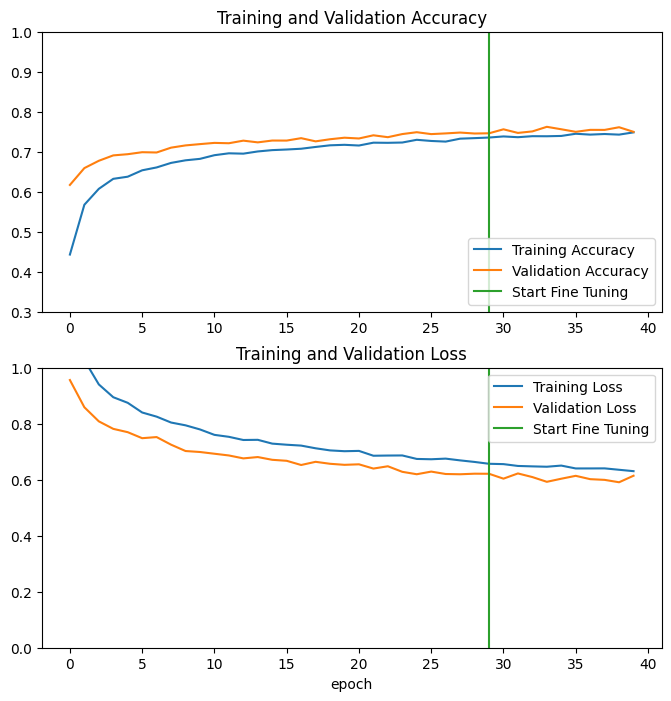

In [70]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc_inceptionv2, label='Training Accuracy')
plt.plot(val_acc_inceptionv2, label='Validation Accuracy')
plt.ylim([0.3, 1])
plt.plot([initial_epoch-1,initial_epoch-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_inceptionv2, label='Training Loss')
plt.plot(val_loss_inceptionv2, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epoch-1,initial_epoch-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# **Analysis the Performance of the Model**

In [71]:
Custom_cnn = [cnn_train_scores[1],cnn_val_scores[1],cnn_test_scores[1]]
VGG_16 = [vgg16_train_scores[1],vgg16_val_scores[1],vgg16_test_scores[1]]
VGG_19 = [vgg19_train_scores[1],vgg19_val_scores[1],vgg19_test_scores[1]]
RestNet_101 = [restnet101_train_scores[1],restnet101_val_scores[1],restnet101_test_scores[1]]
mobilenetv2 = [mobilenetv2_train_scores[1],mobilenetv2_val_scores[1],mobilenetv2_test_scores[1]]
inceptionv2 = [np.mean(acc_inceptionv2),np.mean(val_acc_inceptionv2),inceptionv3_test_scores[1]]

In [73]:
Accuracy = ['Training Accuracy','Validation Accuracy','Test Accuracy']

In [80]:
import pandas as pd
performance = pd.DataFrame({'Accuracy_Scores':Accuracy,\
                            'Custom CNN':Custom_cnn,\
                            'VGG16':VGG_16,\
                            'VGG19':VGG_19,\
                           'RestNet101':RestNet_101,\
                            'Mobile Netv2':mobilenetv2,\
                            'Inception V3':inceptionv2})

In [81]:
performance

,Accuracy_Scores,Custom CNN,VGG16,VGG19,RestNet101,Mobile Netv2,Inception V3
0,Training Accuracy,0.900385,0.653361,0.737701,0.558430,0.707458,0.699041
1,Validation Accuracy,0.899860,0.650648,0.740196,0.557073,0.709559,0.728272
2,Test Accuracy,0.899072,0.648634,0.736257,0.560312,0.704569,0.749212


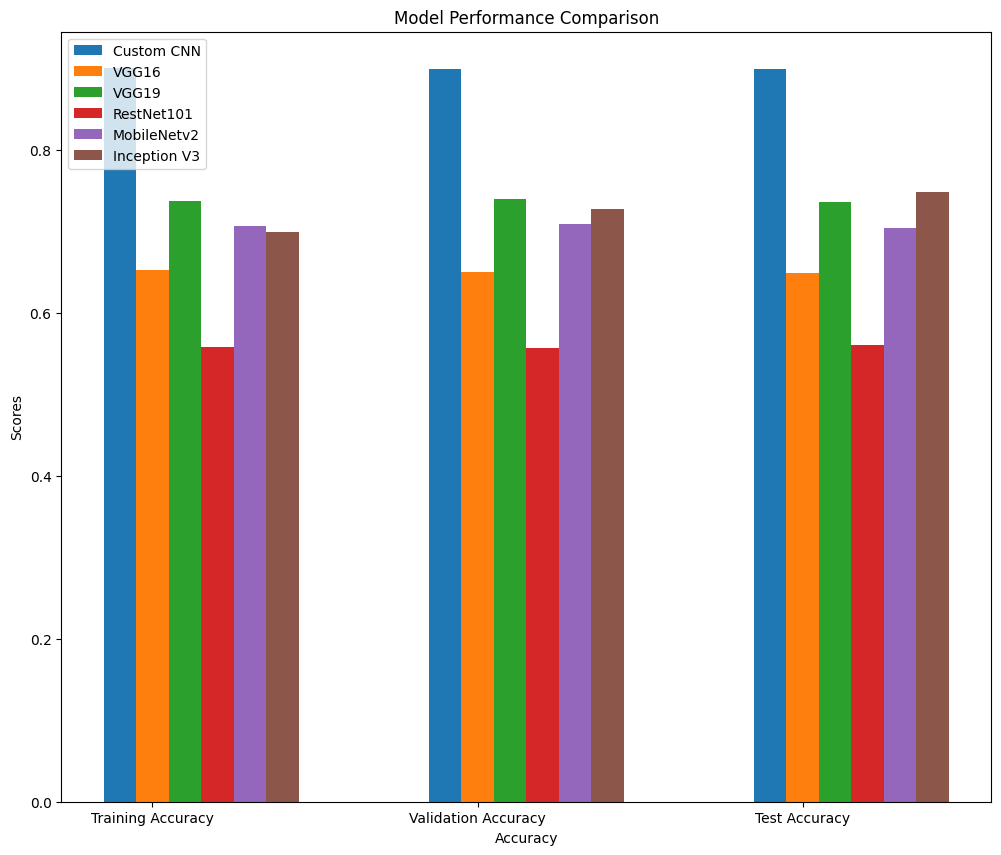

In [82]:
# Set figure size
plt.figure(figsize=(12, 10))

# Define bar width
bar_width = 0.10

# Set X-axis positions
x = np.arange(len(performance))

# Plot bars for each model
plt.bar(x, performance["Custom CNN"], width=bar_width, label="Custom CNN")
plt.bar(x + bar_width, performance['VGG16'], width=bar_width, label="VGG16")
plt.bar(x + 2 * bar_width, performance['VGG19'], width=bar_width, label="VGG19")
plt.bar(x + 3 * bar_width, performance['RestNet101'], width=bar_width, label="RestNet101")
plt.bar(x + 4 * bar_width,performance['Mobile Netv2'],width=bar_width,label = "MobileNetv2")
plt.bar(x + 5 * bar_width,performance['Inception V3'],width=bar_width,label="Inception V3")

# Labels & Title
plt.xlabel("Accuracy")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.xticks(x + bar_width, performance['Accuracy_Scores'])  # Adjust X-ticks position
plt.legend(loc='upper left')  # Add legend

# Show plot
plt.show()

Based on the Performance we select Custom cnn

In [ ]:
performance[['Accuracy_Scores','Custom CNN']]

,Accuracy_Scores,Custom CNN
0,Training Accuracy,0.891136
1,Validation Accuracy,0.871897
2,Test Accuracy,0.891894
